In [144]:
import pandas as pd

file_path = r'C:\Users\Stars\Documents\interview\RXMG_Assessment_Data.xlsx'
data = pd.ExcelFile(file_path)
df = data.parse('Sheet1')

In [145]:
df.head(10)

,Offer ID,Data ID,Date,Drop Number,Delivered,Clicks,CTR,Revenue,eCPM,Offer Type,Audience Type
0,773,75,2022-11-01,2,124248,1137,0.009151,530.0,4.265662,Credit Card,Credit Card
1,882,75,2022-11-01,3,124046,46,0.000371,375.0,3.023072,Home Security,Credit Card
2,408,14,2022-11-01,2,176291,165,0.000936,630.0,3.573637,Education,Housing
3,185,14,2022-11-01,3,176417,168,0.000952,1800.0,10.203098,Home Security,Housing
4,587,14,2022-11-01,4,176463,674,0.003819,444.0,2.516108,Shopping,Housing
5,446,14,2022-11-01,5,176474,722,0.004091,1056.0,5.983884,Credit Card,Housing
6,760,63,2022-11-01,2,203810,113,0.000554,132.0,0.647662,Home Financing,Mortgage
7,760,63,2022-11-01,2,100082,369,0.003687,264.0,2.637837,Home Financing,Mortgage
8,857,63,2022-11-01,3,203794,31,0.000152,508.5,2.495167,Home Improvement,Mortgage
9,857,63,2022-11-01,3,100022,159,0.001590,1186.5,11.862390,Home Improvement,Mortgage


In [146]:
# Clean the data
df_clean = df.groupby(by = ['Date', 'Audience Type', 'Data ID', 'Drop Number', 'Offer ID', 'Offer Type']).sum().reset_index()
df_clean = df_clean.drop(['CTR', 'eCPM'], axis = 1, inplace = False)
df_clean['CTR'] = df_clean['Clicks'] / df_clean['Delivered']
df_clean['eCPM'] = df_clean['Revenue'] * 1000 / df_clean['Delivered']
df_clean.head(10)

,Date,Audience Type,Data ID,Drop Number,Offer ID,Offer Type,Delivered,Clicks,Revenue,CTR,eCPM
0,2022-11-01,Credit Card,75,2,773,Credit Card,124248,1137,530.00,0.009151,4.265662
1,2022-11-01,Credit Card,75,3,882,Home Security,124046,46,375.00,0.000371,3.023072
2,2022-11-01,Housing,14,2,408,Education,176291,165,630.00,0.000936,3.573637
3,2022-11-01,Housing,14,3,185,Home Security,176417,168,1800.00,0.000952,10.203098
4,2022-11-01,Housing,14,4,587,Shopping,176463,674,444.00,0.003819,2.516108
5,2022-11-01,Housing,14,5,446,Credit Card,176474,722,1056.00,0.004091,5.983884
6,2022-11-01,Lending,43,2,882,Home Security,145747,257,3600.00,0.001763,24.700337
7,2022-11-01,Lending,43,3,735,Credit Card,119727,532,1369.43,0.004443,11.437938
8,2022-11-01,Mortgage,63,2,760,Home Financing,303892,482,396.00,0.001586,1.303095
9,2022-11-01,Mortgage,63,3,857,Home Improvement,303816,190,1695.00,0.000625,5.579035


# Prompt 3

## What is the relationship between revenue and clicks? 

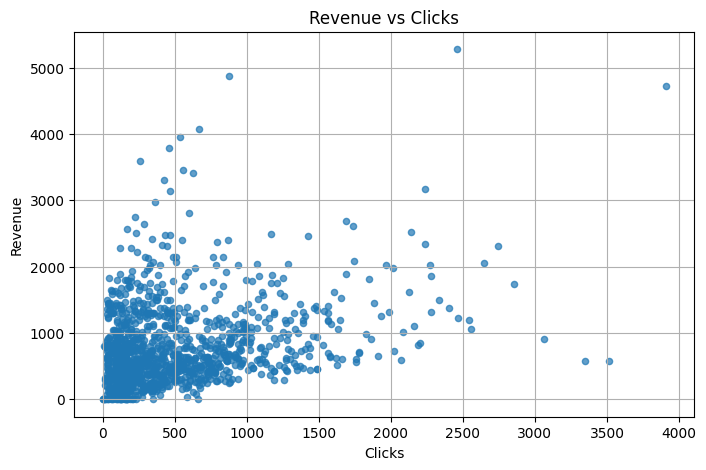

In [147]:
import matplotlib.pyplot as plt

# Scatter plot of the correlation between revenue and clicks per entry
df_clean.plot(
    kind = 'scatter', x = 'Clicks', y = 'Revenue', alpha = 0.7, figsize = (8, 5)
)
plt.title('Revenue vs Clicks')
plt.xlabel('Clicks')
plt.ylabel('Revenue')
plt.grid(True)
plt.show()

In [148]:
# This shows the correlation between clicks and revenue from the raw data -- weak positive correlation
corr = df_clean['Clicks'].corr(df_clean['Revenue'], method = "pearson")
print(corr)

0.29597165897614985


## Does it vary by Data ID?

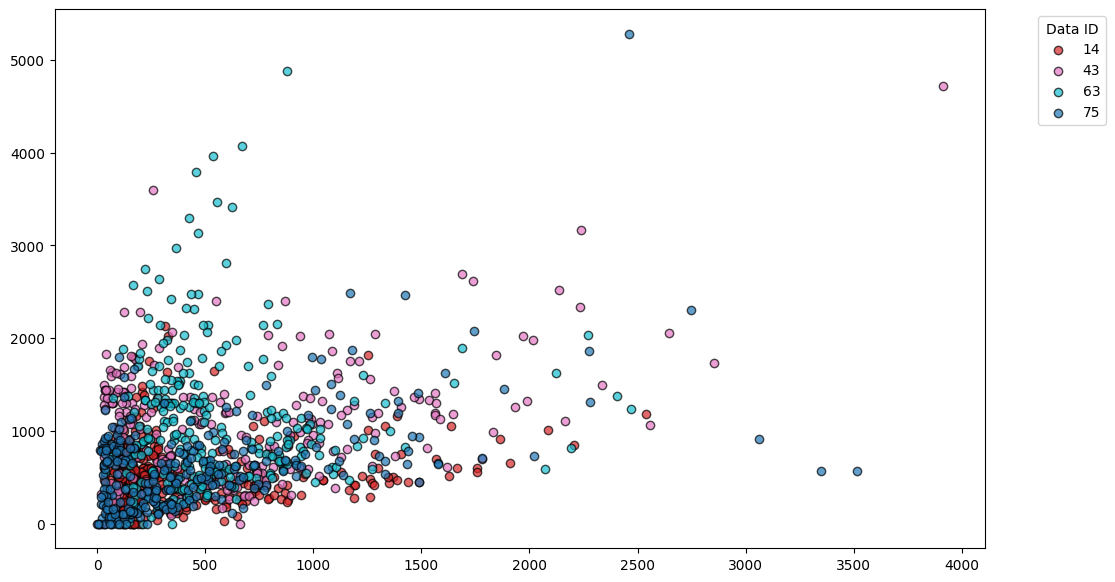

In [149]:
# This categorizes points by Data ID from the raw scatter plot
unique_data_ids = df_clean['Data ID'].unique()
colors = plt.get_cmap('tab10', len(unique_data_ids))
color_map = {data_id: colors(i) for i, data_id in enumerate(unique_data_ids)}

plt.figure(figsize = (12, 7))
for data_id, group in df_clean.groupby('Data ID'):
    plt.scatter(
        group['Clicks'], 
        group['Revenue'], 
        label = f'{data_id}', 
        color = color_map[data_id], 
        alpha = 0.7, 
        edgecolor = 'k'
    )

plt.legend(title = 'Data ID', bbox_to_anchor = (1.05, 1), loc = 'upper left');

In [150]:
# This shows the correlation between clicks and revenue based on each individual instance for each Audience Type
# Shows weak positive correlation for Data ID 43 and 75, but no significant relationship for Data ID 14 and 63
df14 = df_clean[df_clean['Data ID'] == 14]
df43 = df_clean[df_clean['Data ID'] == 43]
df63 = df_clean[df_clean['Data ID'] == 63]
df75 = df_clean[df_clean['Data ID'] == 75]

df_filtered = [df14, df43, df63, df75]
for x in df_filtered:
    data_id = x['Data ID'].unique()[0]
    corr = x[['Clicks', 'Revenue']].corr()
    cr_corr = corr.loc['Clicks', 'Revenue']
    print(f'Correlation for Data ID {data_id}: {cr_corr}')

Correlation for Data ID 14: 0.11254746455333058
Correlation for Data ID 43: 0.37650887457948934
Correlation for Data ID 63: 0.039369257861207596
Correlation for Data ID 75: 0.4738973295437281


**I further separate the graphs to show the unique Data IDs separately.** 

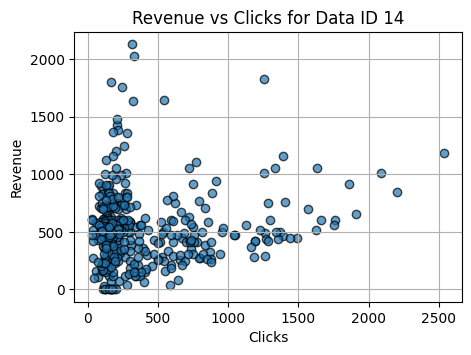

In [151]:
# Filter for Data ID 14
plt.figure(figsize = (5, 3.5))
plt.scatter(
    df14['Clicks'], 
    df14['Revenue'], 
    label = 'Data ID 14', 
    alpha = 0.7, 
    edgecolor = 'k'
)

plt.title('Revenue vs Clicks for Data ID 14')
plt.xlabel('Clicks')
plt.ylabel('Revenue')
plt.grid(True)
plt.show()

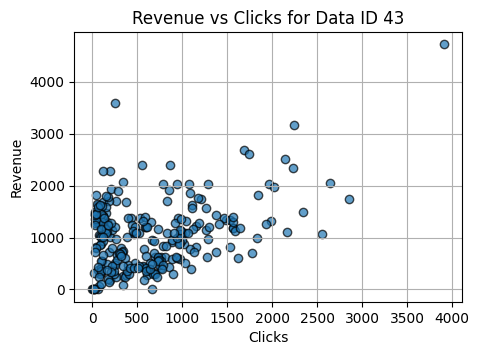

In [152]:
# Filter for Data ID 43
plt.figure(figsize = (5, 3.5))
plt.scatter(
    df43['Clicks'], 
    df43['Revenue'], 
    label = 'Data ID 43', 
    alpha = 0.7, 
    edgecolor = 'k'
)

plt.title('Revenue vs Clicks for Data ID 43')
plt.xlabel('Clicks')
plt.ylabel('Revenue')
plt.grid(True)
plt.show()

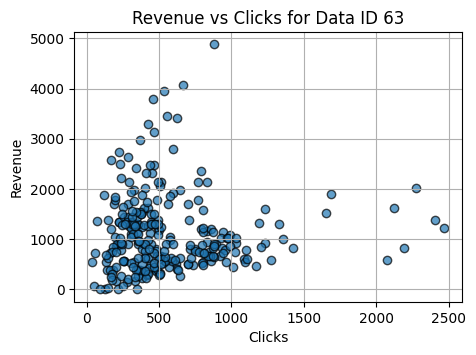

In [153]:
# Filter for Data ID 63
plt.figure(figsize = (5, 3.5))
plt.scatter(
    df63['Clicks'], 
    df63['Revenue'], 
    label = 'Data ID 63', 
    alpha = 0.7, 
    edgecolor = 'k'
)

plt.title('Revenue vs Clicks for Data ID 63')
plt.xlabel('Clicks')
plt.ylabel('Revenue')
plt.grid(True)
plt.show()

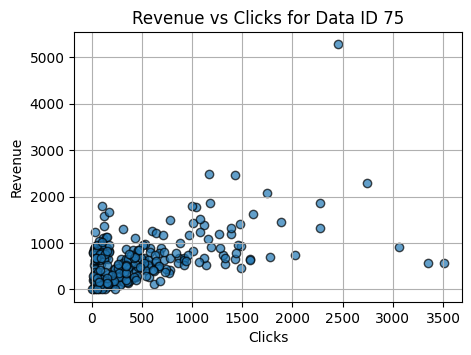

In [154]:
# Filter for Data ID 75
plt.figure(figsize = (5, 3.5))
plt.scatter(
    df75['Clicks'], 
    df75['Revenue'], 
    label = 'Data ID 75', 
    alpha = 0.7, 
    edgecolor = 'k'
)

plt.title('Revenue vs Clicks for Data ID 75')
plt.xlabel('Clicks')
plt.ylabel('Revenue')
plt.grid(True)
plt.show()

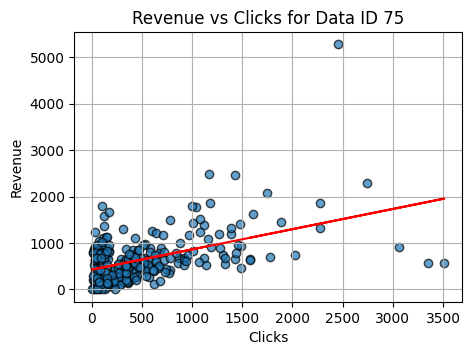

In [155]:
# Line of best fit for Clicks vs Revenue correlational graph for Data ID 75
import numpy as np
from scipy.stats import linregress

x = df75['Clicks']
y = df75['Revenue']

# slope, intercept, r_value, p_value, std_err = linregress(x, y) -- without having to define slope and intercept
coefficients = np.polyfit(x, y, 1)
slope = coefficients[0]
intercept = coefficients[1]
line = slope * x + intercept

plt.figure(figsize = (5, 3.5))
plt.scatter(
    df75['Clicks'], 
    df75['Revenue'], 
    label = 'Data ID 75', 
    alpha = 0.7, 
    edgecolor = 'k'
)
plt.plot(x, line, color = 'red')
plt.title('Revenue vs Clicks for Data ID 75')
plt.xlabel('Clicks')
plt.ylabel('Revenue')
plt.grid(True)
plt.show()

In [156]:
# Show revenue from discrete clicks
click_list = [500, 1000, 1500, 2000, 2500, 3000]

for clk in click_list:
    rev = slope * clk + intercept
    print(rev)

645.5472827769469
863.3981170120494
1081.2489512471518
1299.0997854822544
1516.9506197173569
1734.8014539524593


In [157]:
# Show projected linear growth per 500 clicks
print(slope * 500)

217.8508342351025


# Prompt 2 


## What is happening with the size of the Data IDs over time?

In [158]:
# Pivot table of Delivered aggregated by Data ID
pivot_table = pd.pivot_table(df_clean, values = 'Delivered', index = 'Date', columns = 'Data ID', aggfunc = 'sum')

In [159]:
print(pivot_table)

Data ID         14      43      63      75
Date                                      
2022-11-01  705645  265474  911443  248294
2022-11-02  701962  291068  911439  251264
2022-11-03  700973  290932  413220  252593
2022-11-04  700632  435508  412259  506299
2022-11-05  699927  289632  605775  380753
...            ...     ...     ...     ...
2023-01-27  667320  451514  955754  512563
2023-01-28  502854  490486  955019  408169
2023-01-29  503730  451729  957437  362719
2023-01-30  665756  490934  962396  407438
2023-01-31  375640  452306  962151  370868

[92 rows x 4 columns]


In [160]:
# Create new DataFrame copy to work with and add columns to
df2 = df_clean.copy(deep = True)
df2

,Date,Audience Type,Data ID,Drop Number,Offer ID,Offer Type,Delivered,Clicks,Revenue,CTR,eCPM
0,2022-11-01,Credit Card,75,2,773,Credit Card,124248,1137,530.0,0.009151,4.265662
1,2022-11-01,Credit Card,75,3,882,Home Security,124046,46,375.0,0.000371,3.023072
2,2022-11-01,Housing,14,2,408,Education,176291,165,630.0,0.000936,3.573637
3,2022-11-01,Housing,14,3,185,Home Security,176417,168,1800.0,0.000952,10.203098
4,2022-11-01,Housing,14,4,587,Shopping,176463,674,444.0,0.003819,2.516108
...,...,...,...,...,...,...,...,...,...,...,...
1174,2023-01-31,Lending,43,3,670,Credit Card,124938,168,370.5,0.001345,2.965471
1175,2023-01-31,Lending,43,4,102,Credit Card,163699,1301,1196.0,0.007948,7.306092
1176,2023-01-31,Mortgage,63,2,444,Home Security,320815,410,2320.0,0.001278,7.231582
1177,2023-01-31,Mortgage,63,3,511,Home Financing,320831,1025,744.0,0.003195,2.318978


In [161]:
# Check data type of Date column
print(df2['Date'].dtype)

datetime64[ns]


In [162]:
# Create Year-Month column in order to aggregate Delivered only into specific years and months

# Create separate columns for month and year
df2['Month'] = df2['Date'].dt.month
df2['Year'] = df2['Date'].dt.year

# Create a new column with month and year combined
df2['YYYY-MM'] = df2['Date'].dt.strftime('%Y-%m')
df2

,Date,Audience Type,Data ID,Drop Number,Offer ID,Offer Type,Delivered,Clicks,Revenue,CTR,eCPM,Month,Year,YYYY-MM
0,2022-11-01,Credit Card,75,2,773,Credit Card,124248,1137,530.0,0.009151,4.265662,11,2022,2022-11
1,2022-11-01,Credit Card,75,3,882,Home Security,124046,46,375.0,0.000371,3.023072,11,2022,2022-11
2,2022-11-01,Housing,14,2,408,Education,176291,165,630.0,0.000936,3.573637,11,2022,2022-11
3,2022-11-01,Housing,14,3,185,Home Security,176417,168,1800.0,0.000952,10.203098,11,2022,2022-11
4,2022-11-01,Housing,14,4,587,Shopping,176463,674,444.0,0.003819,2.516108,11,2022,2022-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1174,2023-01-31,Lending,43,3,670,Credit Card,124938,168,370.5,0.001345,2.965471,1,2023,2023-01
1175,2023-01-31,Lending,43,4,102,Credit Card,163699,1301,1196.0,0.007948,7.306092,1,2023,2023-01
1176,2023-01-31,Mortgage,63,2,444,Home Security,320815,410,2320.0,0.001278,7.231582,1,2023,2023-01
1177,2023-01-31,Mortgage,63,3,511,Home Financing,320831,1025,744.0,0.003195,2.318978,1,2023,2023-01


In [163]:
# Create a new pivot table aggregated only by month and year and categorized by Data ID
month_PT = pd.pivot_table(df2, values = 'Delivered', index = 'YYYY-MM', columns = 'Data ID', aggfunc = 'sum')
month_PT

Data ID,14,43,63,75
YYYY-MM,,,,
2022-11,19994510,10828250,22481943,11861114
2022-12,20446618,14425826,26274268,12284181
2023-01,19193621,14278389,29407612,12567775


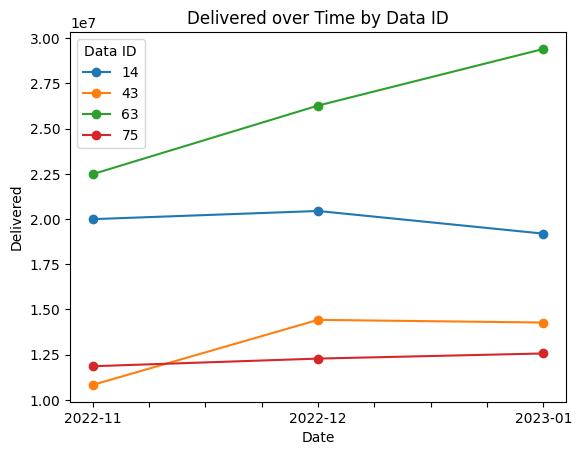

In [164]:
# Line plot for pivot table
month_PT.plot(marker = 'o')
plt.xlabel('Date')
plt.ylabel('Delivered')
plt.legend(title = 'Data ID')
plt.title('Delivered over Time by Data ID')
plt.show()

In [165]:
# Finding the avg slope of Data ID 63
avg_grw63 = (month_PT.loc['2023-01', 63] - month_PT.loc['2022-11', 63]) / 2
print(avg_grw63)

3462834.5


In [166]:
# Avg value of Data ID 14
avg_retention14 = (month_PT.loc['2022-11', 14] + month_PT.loc['2022-12', 14]) / 2
print(avg_retention14)

20220564.0


In [167]:
# January value delivered for Data ID 14
value14 = month_PT.loc['2023-01', 14]
print(value14)

19193621


In [168]:
# Data ID 43 November to December growth
growth43 = month_PT.loc['2022-12', 43] - month_PT.loc['2022-11', 43]
print(growth43)

3597576


In [169]:
# Avg value of Data ID 75
mean75 = month_PT[75].mean()
print(mean75)

12237690.0


## How is that impacting revenue and CTR? 


In [170]:
# Create a new pivot table aggregated by date and categorized by Data ID (Revenue)
revenue_PT = pd.pivot_table(df2, values = 'Revenue', index = 'YYYY-MM', columns = 'Data ID', aggfunc = 'sum')
revenue_PT

Data ID,14,43,63,75
YYYY-MM,,,,
2022-11,74842.65,88999.92,78852.35,59253.63
2022-12,57727.38,94279.08,95181.45,56080.50
2023-01,60849.64,84867.56,130049.50,62816.39


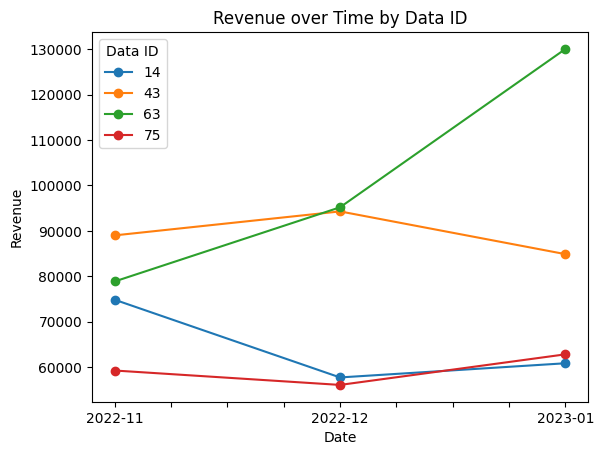

In [171]:
revenue_PT.plot(marker = 'o')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.legend(title = 'Data ID')
plt.title('Revenue over Time by Data ID')
plt.show()

In [172]:
# Create a new pivot table aggregated by date and categorized by Data ID (CTR)
ctrPT = pd.pivot_table(df2, values = 'CTR', index = 'YYYY-MM', columns = 'Data ID', aggfunc = 'mean')
ctrPT

Data ID,14,43,63,75
YYYY-MM,,,,
2022-11,0.002582,0.005318,0.001722,0.003706
2022-12,0.002212,0.003949,0.001939,0.003243
2023-01,0.002751,0.003679,0.002202,0.004049


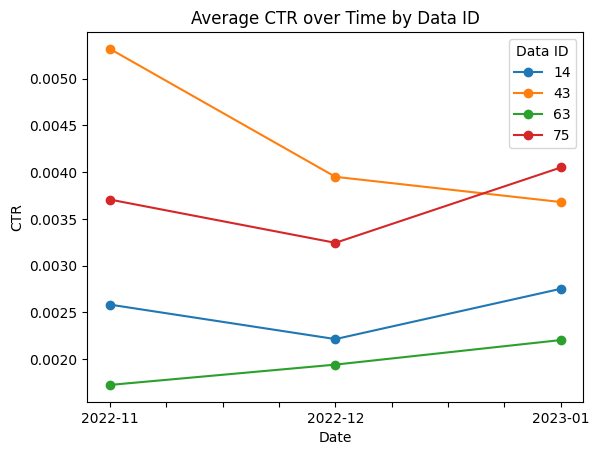

In [173]:
ctrPT.plot(marker = 'o')
plt.xlabel('Date')
plt.ylabel('CTR')
plt.legend(title = 'Data ID')
plt.title('Average CTR over Time by Data ID')
plt.show()

# Self Prompt 1 

## Which Audience Type is reached most successfully?


In [174]:
# Create new DataFrame copy to work with in order to find average eCPM by Data ID
eCPMdata = df2.copy(deep = True)
eCPMdata2 = eCPMdata.drop(['Offer ID', 'Date', 'Drop Number', 'Clicks', 'CTR', 'eCPM', 'Offer Type', 'Month', 'Year', 'YYYY-MM'], axis = 1, inplace = False)

# Recreated a the table to show aggregate sums of the revenue and amount delivered grouped by Data ID
eCPMdata3 = eCPMdata2.groupby('Audience Type').agg(
    revenue = ('Revenue', 'sum'),
    delivered = ('Delivered', 'sum')
).sort_values(by = 'revenue', ascending = False)
eCPMdata3['eCPM'] = eCPMdata3['revenue'] * 1000 / eCPMdata3['delivered']
eCPMdata3

,revenue,delivered,eCPM
Audience Type,,,
Mortgage,304083.30,78163823,3.890333
Lending,268146.56,39532465,6.782946
Housing,193419.67,59634749,3.243405
Credit Card,178150.52,36713070,4.852509


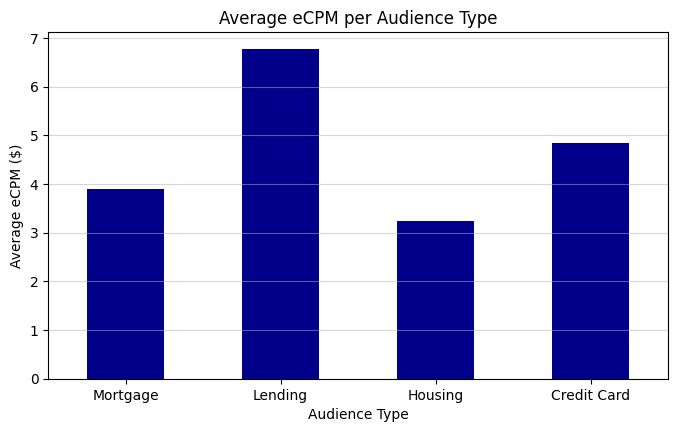

In [175]:
# Bar graph to show the differences in average eCPM for each Data ID
plt.figure(figsize = (8, 4.5))
eCPMdata3['eCPM'].plot(kind = 'bar', color = 'darkblue', alpha = 1)
plt.title('Average eCPM per Audience Type')
plt.xlabel('Audience Type')
plt.ylabel('Average eCPM ($)')
plt.yticks(rotation = 0)
plt.xticks(rotation = 0)
plt.grid(axis = 'y', linestyle = '-', alpha = 0.5)
plt.show()

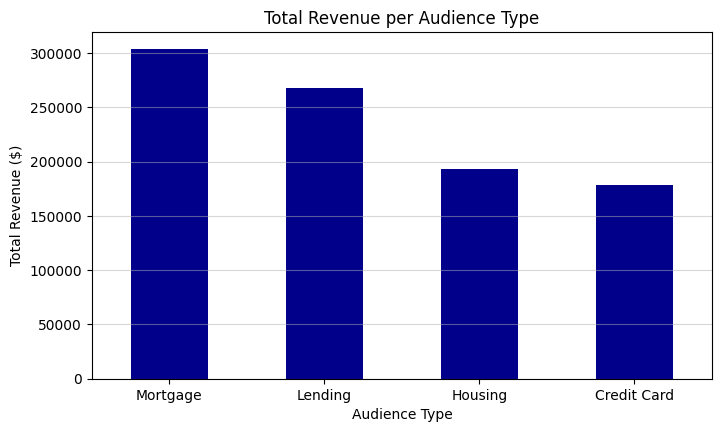

In [176]:
# Bar graph to show the differences in total revenue for each Data ID
plt.figure(figsize = (8, 4.5))
eCPMdata3['revenue'].plot(kind = 'bar', color = 'darkblue', alpha = 1)
plt.title('Total Revenue per Audience Type')
plt.xlabel('Audience Type')
plt.ylabel('Total Revenue ($)')
plt.yticks(rotation = 0)
plt.xticks(rotation = 0)
plt.grid(axis = 'y', linestyle = '-', alpha = 0.5)
plt.show()

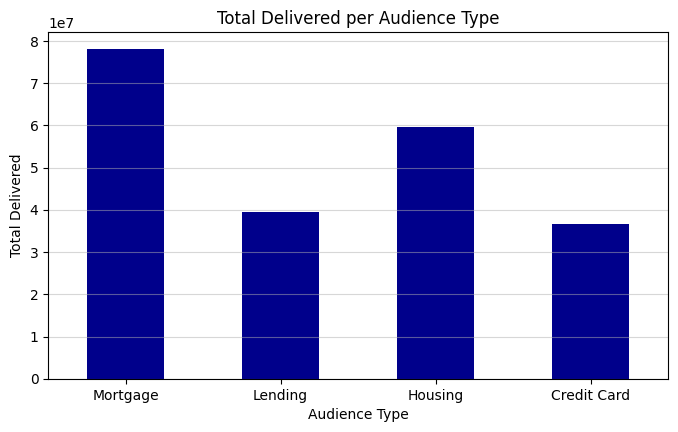

In [177]:
# Bar graph to show the differences in total delivered for each Data ID
plt.figure(figsize = (8, 4.5))
eCPMdata3['delivered'].plot(kind = 'bar', color = 'darkblue', alpha = 1)
plt.title('Total Delivered per Audience Type')
plt.xlabel('Audience Type')
plt.ylabel('Total Delivered')
plt.yticks(rotation = 0)
plt.xticks(rotation = 0)
plt.grid(axis = 'y', linestyle = '-', alpha = 0.5)
plt.show()

# Self Prompt 2 

## What do you think contributes to the weak eCPM performance of the Housing Audience Type on the previous slide? <br/> How may this be improved? 


In [178]:
'''
Because I've asked myself to gather analysis on a specific item in the data,
I created all of these tables for versatility in choosing which Data ID to measure if ever needed.
I also added comments to the code below that allow for different views of the table,
specifically whether we ever want to consider null values for the Delivered column.

For this particular case, all Audience Types except Housing can be ignored,
and I added a graphic visualization of the table in order to compare and contrast the Offer Types
that contributed the most and the least to the Housing Audience Type,
neglecting the Offer Types that did not deliver anything to it
(because we don't know what the impact would have been if there were any offers delivered).
'''

# List of all unique Offer Types across the dataset if you want to include Offer Types with 0 delivered
# all_offer_types = df_clean['Offer Type'].unique()

audience_types = ['Credit Card', 'Housing', 'Lending', 'Mortgage']

# Loop to create and store tables in global variables
for audience in audience_types:
    table_name = f'{audience.lower().replace(' ', '_')}_table'  # Create a variable name (e.g., credit_card_table)
    
    # Aggregate Revenue and Delivered by Offer Type
    table_data = (
        df_clean[df_clean['Audience Type'] == audience]
        .groupby('Offer Type')[['Delivered', 'Revenue']]
        .sum()
        # or .sum(min_count = 1)  -- Ensures that if all values are missing, it's not considered valid
        # .reindex(all_offer_types, fill_value = 0)  -- Include all Offer Types and fill missing with 0
        .reset_index()
    )

    # table_data = table_data.sort_values(by = 'Revenue', ascending = False).reset_index(drop = True)
    
    locals()[table_name] = table_data  # This creates a new variable with the name as table_name

### Credit Card Table

In [179]:
credit_card_table['eCPM'] = credit_card_table['Revenue'] * 1000 / credit_card_table['Delivered']
credit_card_table

,Offer Type,Delivered,Revenue,eCPM
0,Auto Loan,144955,227.70,1.570832
1,Auto Purchase,127663,1305.00,10.222226
2,Auto Warranty,2205071,12621.00,5.723625
3,Bank Account,531430,1613.75,3.036618
4,Beauty,266491,620.00,2.326533
5,Credit Card,13022841,83125.64,6.383065
6,Credit Repair,1602326,8477.47,5.290727
7,Credit Score,1206865,3285.00,2.721928
8,Debt,144111,45.00,0.312259
9,Education,952690,3125.00,3.280186


### Housing Table

In [202]:
housing_table['eCPM'] = housing_table['Revenue'] * 1000 / housing_table['Delivered']
housing_table

,Offer Type,Delivered,Revenue,eCPM
0,Animal Health Insurance,500802,1674.00,3.342638
1,Animal Product,47248,613.00,12.974094
2,Auto Insurance,673544,2862.80,4.250353
3,Auto Purchase,323100,3405.00,10.538533
4,Auto Sale,169179,589.00,3.481520
5,Auto Warranty,2290808,10425.00,4.550796
6,Bank Account,167252,183.49,1.097087
7,Beauty,1688769,3675.00,2.176141
8,Credit Card,6945564,21855.92,3.146745
9,Credit Repair,1689212,7026.29,4.159508


In [203]:
# Calculate the mean and median of the 'eCPM' column
median_eCPM = housing_table['eCPM'].median()
mean_eCPM = housing_table['eCPM'].mean()
print(f'Median: {median_eCPM}')
print(f'Mean: {mean_eCPM}')

Median: 3.2527007300898667
Mean: 3.6840563743029713


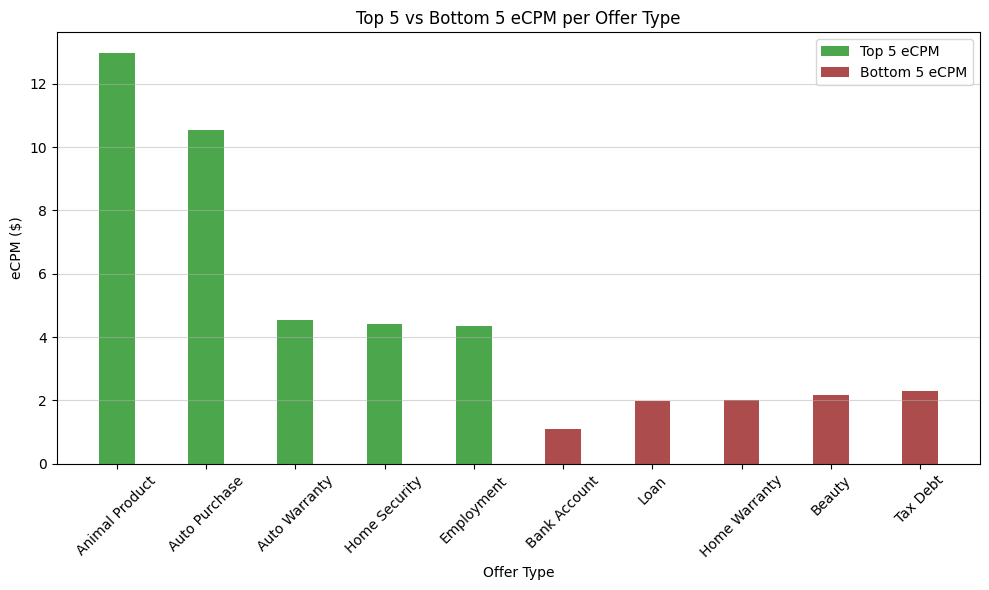

In [204]:
# Create a bar graph to compare and contrast the 5 eCPM that are doing the best and the worst

# eCPM in descending order and select the top 5
top5eCPM = housing_table.sort_values(by = 'eCPM', ascending = False).head(5)

# eCPM in ascending order and select the bottom 5
low5offers = housing_table.sort_values(by = 'eCPM', ascending = True).head(5)

# Combine the top 5 and bottom 5
combined = pd.concat([top5eCPM, low5offers])

fig, ax = plt.subplots(figsize = (10, 6))

# Plot the top 5 eCPM offers
top_bars = ax.bar(top5eCPM['Offer Type'], top5eCPM['eCPM'], color = 'green', alpha = 0.7, width = 0.4, label = 'Top 5 eCPM')

# Plot the bottom 5 eCPM offers
bottom_bars = ax.bar(low5offers['Offer Type'], low5offers['eCPM'], color = 'darkred', alpha = 0.7, width = 0.4, label = 'Bottom 5 eCPM')

ax.set_title('Top 5 vs Bottom 5 eCPM per Offer Type')
ax.set_xlabel('Offer Type')
ax.set_ylabel('eCPM ($)')
ax.tick_params(axis = 'x', rotation = 45)
ax.grid(axis = 'y', linestyle = '-', alpha = 0.5)
ax.legend()

plt.tight_layout()
plt.show()

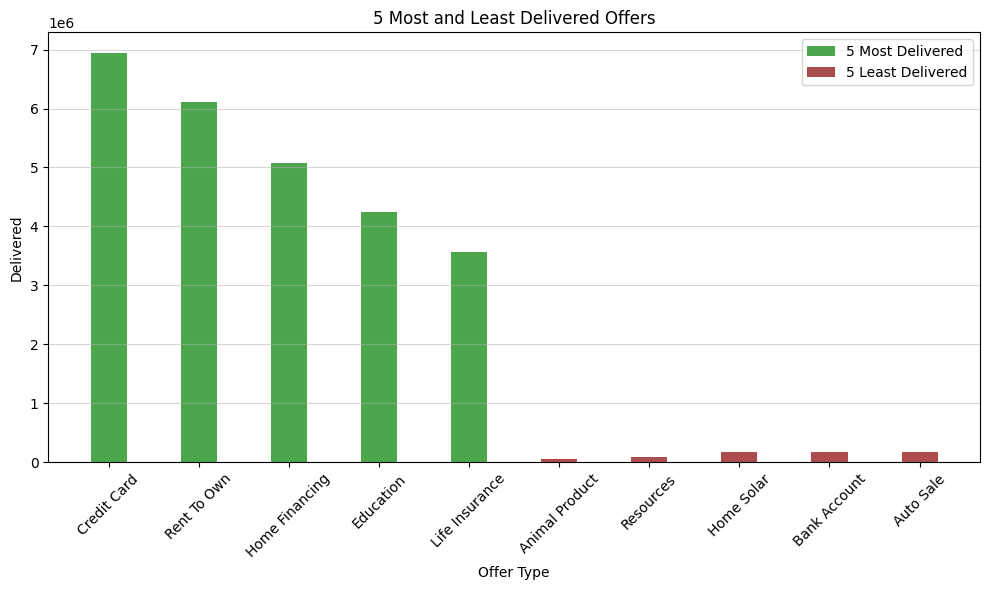

In [206]:
# Create a bar graph to compare and contrast the 5 most and least delivered

# eCPM in descending order and select the top 5
top5del = housing_table.sort_values(by = 'Delivered', ascending = False).head(5)

# eCPM in ascending order and select the bottom 5
low5del = housing_table.sort_values(by = 'Delivered', ascending = True).head(5)

# Combine the top 5 and bottom 5
combined = pd.concat([top5del, low5del])

fig, ax = plt.subplots(figsize = (10, 6))

# Plot the top 5 eCPM offers
most_del = ax.bar(top5del['Offer Type'], top5del['Delivered'], color = 'green', alpha = 0.7, width = 0.4, label = '5 Most Delivered')

# Plot the bottom 5 eCPM offers
least_del = ax.bar(low5del['Offer Type'], low5del['Delivered'], color = 'darkred', alpha = 0.7, width = 0.4, label = '5 Least Delivered')

ax.set_title('5 Most and Least Delivered Offers')
ax.set_xlabel('Offer Type')
ax.set_ylabel('Delivered')
ax.tick_params(axis = 'x', rotation = 45)
ax.grid(axis = 'y', linestyle = '-', alpha = 0.5)
ax.legend()

plt.tight_layout()
plt.show()

In [207]:
# Percentage difference of offers delivered between Animal Products and Bank Account
apVSba = (
    housing_table.loc[housing_table['Offer Type'] == 'Bank Account', 'Delivered'].values[0] * 
    100 / housing_table.loc[housing_table['Offer Type'] == 'Animal Product', 'Delivered'].values[0]
)
print(f'Animal Product vs Bank Account Offers Delivered: {apVSba}%')

baVSap = (
    housing_table.loc[housing_table['Offer Type'] == 'Bank Account', 'eCPM'].values[0] * 
    100 / housing_table.loc[housing_table['Offer Type'] == 'Animal Product', 'eCPM'].values[0]
)
print(f'Animal Product vs Bank Account Offers eCPM: {baVSap}%')

Animal Product vs Bank Account Offers Delivered: 353.9874703691162%
Animal Product vs Bank Account Offers eCPM: 8.455981730823664%


### Lending Table

In [138]:
lending_table['eCPM'] = lending_table['Revenue'] * 1000 / lending_table['Delivered']
lending_table

,Offer Type,Delivered,Revenue,eCPM
0,Auto Loan,469901,3554.10,7.563508
1,Auto Purchase,145021,720.00,4.964798
2,Auto Sale,176417,1150.00,6.518646
3,Auto Warranty,2028459,21989.00,10.840249
4,Bank Account,306273,513.01,1.675009
5,Beauty,212915,860.00,4.039171
6,Credit Card,18039968,125118.37,6.935620
7,Credit Repair,1419099,12614.32,8.888964
8,Credit Score,794788,1671.00,2.102447
9,Debt,637864,6950.00,10.895740


### Mortgage Table

In [115]:
mortgage_table['eCPM'] = mortgage_table['Revenue'] * 1000 / mortgage_table['Delivered']
mortgage_table

,Offer Type,Delivered,Revenue,eCPM
0,Home Financing,26198137,58872.00,2.247183
1,Home Security,4649197,39255.00,8.443394
2,Home Warranty,5275707,33773.00,6.401606
3,Identity Protection,5135038,24991.20,4.866799
4,Auto Warranty,3860788,19837.20,5.138122
5,Credit Card,4333790,16318.95,3.765515
6,Life Insurance,3625065,15407.20,4.250186
7,Injury Claim,2689938,12289.40,4.568655
8,Home Improvement,2408364,10161.50,4.219254
9,Credit Repair,2040604,9584.32,4.696805
